<a href="https://colab.research.google.com/github/chiayukuo/Homework/blob/master/predict%20churning%20customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading data & Data cleaning

In [1]:
install.packages("caret")
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(caret)
library(randomForest)

In [3]:
churner <- read.csv("BankChurners.csv")

In [4]:
churners<-churner%>%
select(-c(1,22,23))

In [5]:
# Delete rows containing "Unknown"
churners <- churners[- grep("Unknown", churners$Education_Level),]
churners <- churners[- grep("Unknown", churners$Marital_Status),]
churners <- churners[- grep("Unknown", churners$Income_Category),]

In [6]:
churners<-churners%>%
mutate(Attrition_Flag=ifelse(Attrition_Flag=="Existing Customer",0,1),Attrition_Flag=as.factor(Attrition_Flag))%>%
mutate_if(is.character,as.factor)

In [ ]:
# Creating dummy variables
#vars_dummy <- churners4[, c("Gender", "Marital_Status")]
#vars_dummy <- churners4[, c("Gender", "Marital_Status","Education_Level", "Income_Category", "Card_Category")]
#dummy      <- dummyVars("~.", data = vars_dummy)
#dummy_     <- predict(dummy, vars_dummy) 

# Concatenating the new dummy variables in the dataset

#head(dummy_)

#churners4 <- dplyr::select(cbind(churners4, dummy_), -c("Gender", "Gender.F", "Marital_Status"))
#churners4 <- dplyr::select(cbind(churners4, dummy_), -c("Gender", "Gender.F", "Marital_Status","Education_Level", "Income_Category", "Card_Category"))

#colnames(churners4)[which(names(churners4) == "Education_Level.High School")] <- "Education_Level.High_School"
#colnames(churners4)[which(names(churners4) == "Education_Level.Post-Graduate")] <- "Education_Level.Post_Graduate"
#colnames(churners4)[which(names(churners4) == "Income_Category.$120K +")] <- "Income_Category.120K"
#colnames(churners4)[which(names(churners4) == "Income_Category.Less than $40K")] <- "Income_Category.Less_than_40K"
#colnames(churners4)[which(names(churners4) == "Income_Category.$40K - $60K")] <- "Income_Category.40K_60K"
#colnames(churners4)[which(names(churners4) == "Income_Category.$60K - $80K")] <- "Income_Category.60K_80K"
#colnames(churners4)[which(names(churners4) == "Income_Category.$80K - $120K")] <- "Income_Category.80K_120K"

In [7]:
# Removing Low Variance variables
zero_nearzero_variance<-nearZeroVar(churners)
zero_nearzero_variance
churners<-churners%>%
select(-20)

# Multi-correlated variables
correlated<-findCorrelation(cor(churners[,-c(1,3,5,6,7,8)]),names=T) # not include fct.
correlated
# Removing the variables that is also highly correlated with one of the other variables
churners<-churners%>%
select(-correlated)
head(churners)

integer(0)

[1] "Avg_Open_To_Buy"

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(correlated)` instead of `correlated` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,1.335,1144,42,1.625
2,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256,864,1.541,1291,33,3.714
3,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418,0,2.594,1887,20,2.333
5,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716,0,2.175,816,28,2.500
6,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010,1247,1.376,1088,24,0.846
9,0,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352,2517,3.355,1350,24,1.182


In [8]:
shuffle<-sample(nrow(churners))
churners<-churners[shuffle,]

split<-round(nrow(churners)*0.75)
train<-churners[1:split,]
test<-churners[(split+1):nrow(churners),]

In [ ]:
# Finding important variable

                         MeanDecreaseGini
Customer_Age                     55.75048
Gender                           10.64991
Dependent_count                  22.03545
Education_Level                  26.51289
Marital_Status                   12.66864
Income_Category                  23.13033
Card_Category                     4.57431
Months_on_book                   39.53299
Total_Relationship_Count         91.57189
Months_Inactive_12_mon           37.75607
Contacts_Count_12_mon            43.49164
Credit_Limit                     60.08483
Total_Revolving_Bal             210.34613
Total_Amt_Chng_Q4_Q1             99.76693
Total_Trans_Amt                 271.18658
Total_Trans_Ct                  233.13307
Total_Ct_Chng_Q4_Q1             164.59255


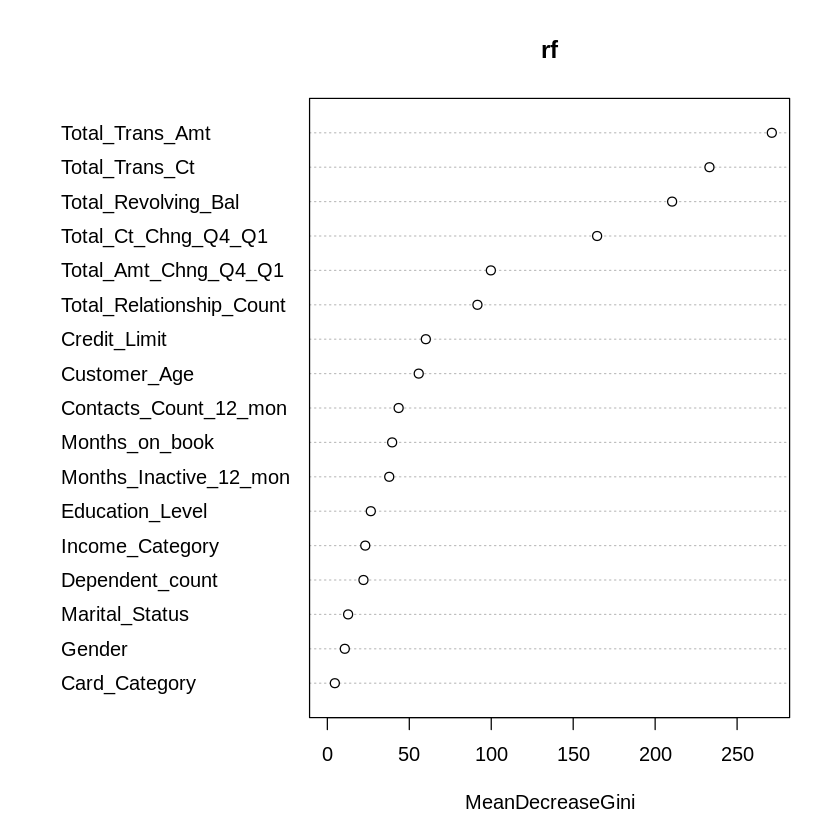

In [9]:
rf<-randomForest(Attrition_Flag~.,data=train)
print(rf$importance)
varImpPlot(rf)

In [ ]:
# train[,11:32] <- sapply(train[, 11:32], as.integer)

In [ ]:
# Training model

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1491   31
         1   19  229
                                         
               Accuracy : 0.9718         
                 95% CI : (0.9629, 0.979)
    No Information Rate : 0.8531         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8851         
                                         
 Mcnemar's Test P-Value : 0.1198         
                                         
            Sensitivity : 0.9874         
            Specificity : 0.8808         
         Pos Pred Value : 0.9796         
         Neg Pred Value : 0.9234         
             Prevalence : 0.8531         
         Detection Rate : 0.8424         
   Detection Prevalence : 0.8599         
      Balanced Accuracy : 0.9341         
                                         
       'Positive' Class : 0              
                                         

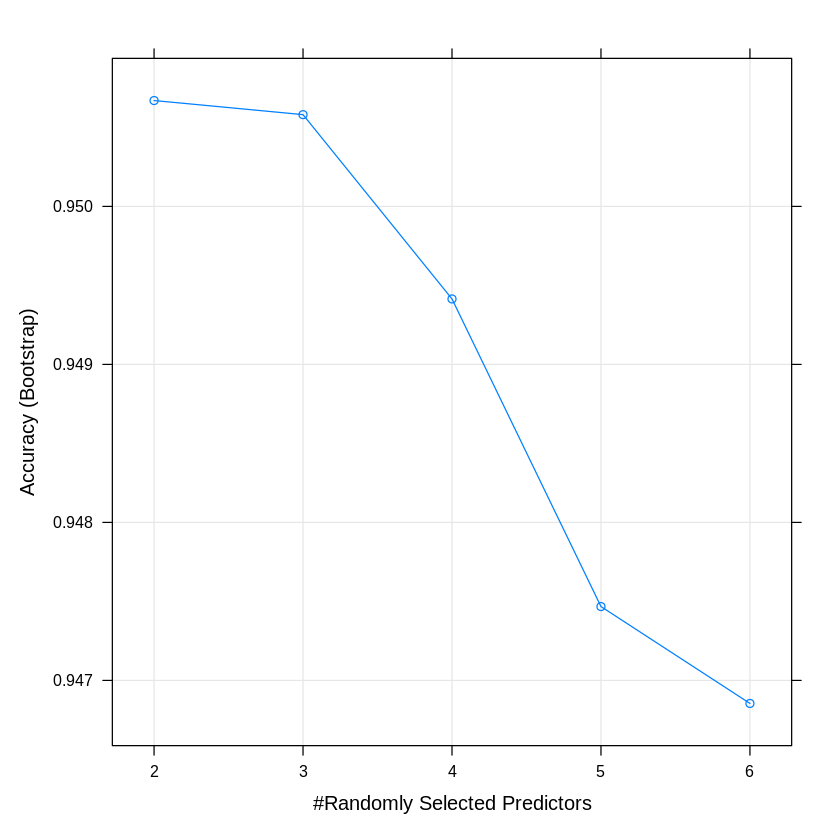

In [ ]:
# grid

# DownSampling
set.seed(1000)
my_control1<-trainControl(method="cv",number=10,summaryFunction = twoClassSummary,classProbs = TRUE,verboseIter = TRUE,savePredictions = TRUE,sampling="down",search = "grid")
tunegrid <- expand.grid(.mtry = (1:14)) 
rfMdl_balanced<-caret::train(Attrition_Flag~.,data=train,method="rf",traincontrol=my_control1,ntree = 80, tuneGrid = tunegrid)
plot(rfMdl_balanced)

test$predict_balanced<-predict(rfMdl_balanced,test)
confusionMatrix(test$predict_balanced,test$Attrition_Flag)

In [ ]:
#print(rfMdl_balanced)

In [ ]:
# pred_accuracy

pred_test <- predict(rfMdl_balanced, newdata=test)
  
pred_testing <- ifelse(pred_test == test$Attrition_Flag , 1,0)
testing_accuracy <- round(length(pred_testing[pred_testing==1])/length(pred_testing),5)

print(testing_accuracy)

[1] 0.97175


In [ ]:
# Confusion Matrix

In [ ]:
cft <- table(pred_test, test$Attrition_Flag)
cft

         
pred_test    0    1
        0 1490   30
        1   20  230

In [ ]:
(tp <- cft[2, 2])
(tn <- cft[1, 1])
(fp <- cft[2, 1])
(fn <- cft[1, 2])

[1] 230

[1] 1490

[1] 20

[1] 30

In [ ]:
print(accuracy <- (tp + tn)/(tp + tn + fp + fn))
print(sensitivity <- tp/(tp + fn)) # = recall
print(specificity <- tn/(tn + fp))

[1] 0.9717514
[1] 0.8846154
[1] 0.986755


In [ ]:
print(Precision <- tp/(tp + fp))

[1] 0.92
